# Install nltk library and download Gutenberg's digital books from it

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import nltk

nltk.download('gutenberg')
books_names=nltk.corpus.gutenberg.fileids()
books_names

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

# Data Exploration

<h3>Choose 5 books from the same category and different authors<h3>

In [ ]:
books_idx=[12,8,11,0,5]
selected_books=[]
for idx in books_idx :
  selected_books.append(books_names[idx])
print(selected_books)

['melville-moby_dick.txt', 'chesterton-ball.txt', 'edgeworth-parents.txt', 'austen-emma.txt', 'bryant-stories.txt']


<h3>Firstly , let's see these books content

In [ ]:
book_contents=[]
for book_name in selected_books:
  book_contents.append(nltk.corpus.gutenberg.raw(book_name))
book_contents[0]

'[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY.\r\n\r\n(Supplied by a Late Consumptive Usher to a Grammar School)\r\n\r\nThe pale Usher--threadbare in coat, heart, body, and brain; I see him\r\nnow.  He was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.  He loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.\r\n\r\n"While you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter H, which almost alone maketh the signification\r\nof the word, you deliver that which is not true." --HACKLUYT\r\n\r\n"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness\r\nor rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER\'S\r\nDICTIONARY\r\n\r\n"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;\r\nA.S. WALW-IAN, t

<h3>From the previous results,we can see that the books have many problems in their content ,so we should clean them

# Data Preprocessing

## Clean the content of the books by word lowering, replacing some patterns, Lemmatization and tokenization.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import re

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    #remove punctuation and strange characters
    #cleaned_text = re.sub("\"|'|\[|,|\.|;|]|!|\?|_|-|\(|\)|&|@|#|%|\^|\*|:|","", text)
    #cleaned_text = re.sub("\n|\r|\x1a","", cleaned_text)
    #remove extra white spaces
    #cleaned_text = re.sub("\s\s+"," ", cleaned_text)
    #lower case the text
    #cleaned_text=cleaned_text.lower()
    # stop_words.extend(['come','order','try','go','get','make','drink','plate','dish','restaurant','place','would','really','like','great','service','came','got'])
    lemmatizer = WordNetLemmatizer()
    sub_pattern = r'[^A-Za-z]'
    split_pattern = r"\s+"
    #remove stop words
    stop_words = stopwords.words('english') + ['never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd"]
    lower_book = text.lower()                                              # Converting all words into lower case.
    filtered_book = re.sub(sub_pattern,' ',lower_book).lstrip().rstrip()   # Replacing all characters except those in the pattern into spaces.
    filtered_book = word_tokenize(filtered_book)                      # tokenizethe whole book into words in a list.
    filtered_book = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_book if word not in stop_words]
    return filtered_book


In [ ]:
cleaned_books_contents=[]
for book in book_contents :
  cleaned_books_contents.append(clean_text(book))
cleaned_books_contents[0]

['moby',
 'dick',
 'herman',
 'melville',
 'etymology',
 'supply',
 'late',
 'consumptive',
 'usher',
 'grammar',
 'school',
 'pale',
 'usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'see',
 'dust',
 'old',
 'lexicon',
 'grammar',
 'queer',
 'handkerchief',
 'mockingly',
 'embellish',
 'gay',
 'flag',
 'know',
 'nation',
 'world',
 'love',
 'dust',
 'old',
 'grammar',
 'somehow',
 'mildly',
 'remind',
 'mortality',
 'take',
 'hand',
 'school',
 'others',
 'teach',
 'name',
 'whale',
 'fish',
 'call',
 'tongue',
 'leave',
 'ignorance',
 'letter',
 'h',
 'almost',
 'alone',
 'maketh',
 'signification',
 'word',
 'deliver',
 'true',
 'hackluyt',
 'whale',
 'sw',
 'dan',
 'hval',
 'animal',
 'name',
 'roundness',
 'roll',
 'dan',
 'hvalt',
 'arch',
 'vault',
 'webster',
 'dictionary',
 'whale',
 'immediately',
 'dut',
 'ger',
 'wallen',
 'walw',
 'ian',
 'roll',
 'wallow',
 'richardson',
 'dictionary',
 'ketos',
 'greek',
 'cetus',
 'latin',
 'whoel',
 'anglo',
 'saxon',
 'h

## Creating 200 random samples from each book and make each sample contains 100 word

In [ ]:
def book_samples(book,n_samples) :
    # book_list=book.split(' ')
    import random
    samples=[]
    start=0
    while start +100 < len(book)-1:
        # start=random.randint(start,start+20)
        temp1=""
        # if start+100 > len(book_list)-1 :
        #     break
        for j in range(start,start+n_samples):
            temp1+= book[j] + " "
        samples.append(temp1)
        start+=100
    random_samples_index=random.sample(range(0,len(samples)),k=min(200,len(samples)))
    partitions=[]
    for idx in random_samples_index :
        partitions.append(samples[idx])
    return partitions

In [ ]:
samples_of_books=[]
for cleaned_book in cleaned_books_contents :
  samples_of_books.append(book_samples(cleaned_book,100))
samples_of_books

[['reason timely spin round boat upon axis bow anticipation make face whale head yet water perceive stratagem moby dick malicious intelligence ascribed sidelingly transplant instant shoot pleat head lengthwise beneath boat every plank rib thrill instant whale obliquely lie back manner biting shark slowly feelingly take bow full within mouth long narrow scroll low jaw curl high open air one teeth caught row lock bluish pearl white inside jaw within six inch ahab head reach high attitude white whale shook slight cedar mildly cruel cat mouse unastonished eye fedallah gaze cross arm tiger yellow crew tumble head gain uttermost stern ',
  'indeed exceptionable still additional consideration though strictly accord wildness ruling passion yet mean incapable sway accomplish object ahab must use tool tool use shadow moon men apt get order knew example however magnetic ascendency respect starbuck yet ascendency cover complete spiritual man mere corporeal superiority involves intellectual masters

<h1>Creating a data frame that contains 2 columns and 1000 rows which represent the smaples of the books and the book name

In [ ]:
import pandas as pd
data_frame =pd.DataFrame()
data_frame['Sample of the book']=[item for sublist in samples_of_books for item in sublist]
target=[[selected_books[i]]*min(200,len(samples_of_books[i])) for i in range(len(selected_books)) ]
data_frame['Book_name']=[item for sublist in target for item in sublist]
data_frame['Book_name'].unique()

array(['melville-moby_dick.txt', 'chesterton-ball.txt',
       'edgeworth-parents.txt', 'austen-emma.txt', 'bryant-stories.txt'],
      dtype=object)

<h3>Shuffling the output dataframe with sklearn

In [ ]:
from sklearn.utils import shuffle
data_frame = shuffle(data_frame)
data_frame

,Sample of the book,Book_name
565,upon desk mr attorney nine guinea count do yet...,edgeworth-parents.txt
519,friend loveit contrary wish universally like h...,edgeworth-parents.txt
331,begin quiet say magistrate angrily undesirable...,chesterton-ball.txt
534,matter land want take advantage wish welcome l...,edgeworth-parents.txt
751,recommendation world general fact beautiful gi...,austen-emma.txt
...,...,...
684,fresh complacency emma directly sure knew make...,austen-emma.txt
312,alone wood spring james turnbull saw suddenly ...,chesterton-ball.txt
692,first display wealth pomp king lord earth luxu...,austen-emma.txt
201,sent inquire doctor awful crash sent one woode...,chesterton-ball.txt


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y= label_encoder.fit_transform(data_frame['Book_name'])
data_frame['Book_name']=y

## Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(data_frame,test_size=0.2,random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(data_frame['Sample of the book'], data_frame['Book_name'], random_state = 0,test_size=0.2)
df_train

,Sample of the book,Book_name
475,nothing sir something say sir great deal promi...,3
643,vocal instrumental attempt conceal infinitely ...,0
169,thing indeed deem self serious thing veriest t...,4
165,vinegar cruet broken away occupation attend ca...,4
697,deny knowledge must conclude come campbell sur...,0
...,...,...
373,coat heel carry coat something look like stick...,2
584,side melon englishman left native country extr...,3
270,army navy store macian stop jar pickle hand sa...,2
711,one half world understand pleasure later morni...,0


# Word Embedding

## Using BERT as pretrained model

Bert can be used as a word embedding pretrained model and then use these embedded vectors to train another model like SVM or Naieve bays and DL models like RNN or LSTM  

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 32.7 MB/s 
     |████████████████████████████████| 6.6 MB 56.6 MB/s 
     |████████████████████████████████| 596 kB 72.0 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


First,Load the pretrained model 

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

## BERT is the encoder of transformers and it consists of 12 layers ,so we can take the output of these layers as the embedded vector

### There are three approches in the embedding vectors

#### Concatenate the last four layers

In [ ]:
def word_embedding_BERT_concate_last_4layers(sentence):
  # Add the special tokens.
  marked_text = "[CLS] " + sentence + " [SEP]"
  # Split the sentence into tokens.
  tokenized_text = tokenizer.tokenize(marked_text)
  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  # Mark each of the tokens as belonging to sentence "1".
  segments_ids = [1] * len(tokenized_text)
  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens],)
  segments_tensors = torch.tensor([segments_ids])
  # Load pre-trained model (weights)
  model = BertModel.from_pretrained('bert-base-uncased',
                                    output_hidden_states = True, # Whether the model returns all hidden-states.
                                    )

  # Put the model in "evaluation" mode, meaning feed-forward operation.
  model.eval()
  # Run the text through BERT, and collect all of the hidden states produced
  # from all 12 layers. 
  with torch.no_grad():

      outputs = model(tokens_tensor, segments_tensors)

      # Evaluating the model will return a different number of objects based on 
      # how it's  configured in the `from_pretrained` call earlier. In this case, 
      # becase we set `output_hidden_states = True`, the third item will be the 
      # hidden states from all layers. See the documentation for more details:
      # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
      hidden_states = outputs[2]
  # For the 5th token in our sentence, select its feature values from layer 5.
  token_i = 5
  layer_i = 5
  batch_i=0
  vec = hidden_states[layer_i][batch_i][token_i]
  # Concatenate the tensors for all layers. We use `stack` here to
  # create a new dimension in the tensor.
  token_embeddings = torch.stack(hidden_states, dim=0)
  # Remove dimension 1, the "batches".
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  # Swap dimensions 0 and 1.
  token_embeddings = token_embeddings.permute(1,0,2)
  # Stores the token vectors, with shape [len(tokenized_text) x 3,072]
  token_vecs_cat = []
  '''Concate the last four layers'''
  # `token_embeddings` is a [len(tokenized_text) x 12 x 768] tensor.

  # For each token in the sentence...
  for token in token_embeddings:
      
      # `token` is a [12 x 768] tensor

      # Concatenate the vectors (that is, append them together) from the last 
      # four layers.
      # Each layer vector is 768 values, so `cat_vec` is length 3,072.
      cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
      
      # Use `cat_vec` to represent `token`.
      token_vecs_cat.append(cat_vec)

  print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))
  print(token_vecs_cat)
  return token_vecs_cat

#### Sum the last four layers

In [ ]:
def word_embedding_BERT_sum_last_4layers(sentence):
  # Add the special tokens.
  marked_text = "[CLS] " + sentence + " [SEP]"
  # Split the sentence into tokens.
  tokenized_text = tokenizer.tokenize(marked_text)
  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  # Mark each of the tokens as belonging to sentence "1".
  segments_ids = [1] * len(tokenized_text)
  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  # Load pre-trained model (weights)
  model = BertModel.from_pretrained('bert-base-uncased',
                                    output_hidden_states = True, # Whether the model returns all hidden-states.
                                    )

  # Put the model in "evaluation" mode, meaning feed-forward operation.
  model.eval()
  # Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
  with torch.no_grad():

      outputs = model(tokens_tensor, segments_tensors)

      # Evaluating the model will return a different number of objects based on 
      # how it's  configured in the `from_pretrained` call earlier. In this case, 
      # becase we set `output_hidden_states = True`, the third item will be the 
      # hidden states from all layers. See the documentation for more details:
      # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
      hidden_states = outputs[2]
  # For the 5th token in our sentence, select its feature values from layer 5.
  token_i = 5
  layer_i = 5
  batch_i=0
  vec = hidden_states[layer_i][batch_i][token_i]
  # Concatenate the tensors for all layers. We use `stack` here to
  # create a new dimension in the tensor.
  token_embeddings = torch.stack(hidden_states, dim=0)
  # Remove dimension 1, the "batches".
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  # Swap dimensions 0 and 1.
  token_embeddings = token_embeddings.permute(1,0,2)
  # Stores the token vectors, with shape [len(tokenized_text) x 3,072]
  token_vecs_sum = []

  # `token_embeddings` is a [22 x 12 x 768] tensor.

  # For each token in the sentence...
  for token in token_embeddings:

      # `token` is a [12 x 768] tensor

      # Sum the vectors from the last four layers.
      sum_vec = torch.sum(token[-4:], dim=0)
      
      # Use `sum_vec` to represent `token`.
      token_vecs_sum.append(sum_vec)

  print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

#### Embed the full sectence by taking the mean of the embedding vectors of the tokenized words

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
def sentence_embedding_BERT(sentence):
  # Add the special tokens.
  marked_text = "[CLS] " + sentence + " [SEP]"
  # Split the sentence into tokens.
  tokenized_text = tokenizer.tokenize(marked_text)
  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  # Display the words with their indeces.
  # for tup in zip(tokenized_text, indexed_tokens):
  #   print('{:<12} {:>6,}'.format(tup[0], tup[1]))
  # Mark each of the 22 tokens as belonging to sentence "1".
  segments_ids = [1] * len(tokenized_text)
  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens],device='cuda')
  segments_tensors = torch.tensor([segments_ids],device='cuda')
  # Load pre-trained model (weights)
  model = BertModel.from_pretrained('bert-base-uncased',
                                    output_hidden_states = True,# Whether the model returns all hidden-states.

                                    )


  # Put the model in "evaluation" mode, meaning feed-forward operation.
  model.cuda()
  model.eval()
  # Run the text through BERT, and collect all of the hidden states produced
  # from all 12 layers. 
  with torch.no_grad():

      outputs = model(tokens_tensor, segments_tensors)

      # Evaluating the model will return a different number of objects based on 
      # how it's  configured in the `from_pretrained` call earlier. In this case, 
      # becase we set `output_hidden_states = True`, the third item will be the 
      # hidden states from all layers. See the documentation for more details:
      # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
      hidden_states = outputs[2]
  # For the 5th token in our sentence, select its feature values from layer 5.
  token_i = 5
  layer_i = 5
  batch_i=0
  # vec = hidden_states[layer_i][batch_i][token_i]
  # print(vec)

  # Concatenate the tensors for all layers. We use `stack` here to
  # create a new dimension in the tensor.
  token_embeddings = torch.stack(hidden_states, dim=0)
  # Remove dimension 1, the "batches".
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  # Swap dimensions 0 and 1.
  token_embeddings = token_embeddings.permute(1,0,2)
  # `hidden_states` has shape [13 x 1 x 22 x 768]

  # `token_vecs` is a tensor with shape [22 x 768]
  token_vecs = hidden_states[-2][0]

  # Calculate the average of all 22 token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0)
  return sentence_embedding


According to limited computational power ,so we will only try to sentence embedding 

In [ ]:
# sentence_embedding_BERT()
BERT_embedding_vectors_train=[]
for partition in df_train['Sample of the book']:
  BERT_embedding_vectors_train.append(sentence_embedding_BERT(partition).tolist())
BERT_embedding_vectors_test=[]
for partition in df_test['Sample of the book']:
  BERT_embedding_vectors_test.append(sentence_embedding_BERT(partition).tolist())

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_rela

In [ ]:
len(BERT_embedding_vectors_train[0])

768

## BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

BOW = CountVectorizer()
BOW_train = BOW.fit_transform(X_train)
BOW_test = BOW.transform(X_test)

## TF_IDF<br>


Tf_idf with unigram has been applied.

In addition, to understand the relation between each consecutive pair of words, tfidf with bigram has applied.
  
Furthermore, we applied tfidf with trigram to find out wether there is a relation between each consecutive three words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_ngram(n_gram,X_train=X_train,X_test=X_test):
    vectorizer = TfidfVectorizer(ngram_range=(1,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    x_test_vec = vectorizer.transform(X_test)
    return x_train_vec,x_test_vec 

### Applying tfidf with 1-gram, 2-gram and 3-gram

In [ ]:
# Applying tfidf with 1-gram, 2-gram and 3-gram
X_trained1g_cv,X_test1g_cv = tfidf_ngram(1,X_train=X_train,X_test=X_test)
X_trained2g_cv,X_test2g_cv = tfidf_ngram(2,X_train=X_train,X_test=X_test)

## Glove

### Load Glove pre-trained models

In [ ]:
import tensorflow as tf
import numpy as np

train_Sentences = list(df_train['Sample of the book'])
test_Sentences = list(df_test['Sample of the book'])
# y = LabelEncoder().fit_transform(df_train['Book_name'])
train_tokenizer = tf.keras.preprocessing.text.Tokenizer()
train_tokenizer.fit_on_texts(train_Sentences)

test_tokenizer = tf.keras.preprocessing.text.Tokenizer()
test_tokenizer.fit_on_texts(train_Sentences)

train_vocab_size = len(train_tokenizer.word_index) + 1
test_vocab_size = len(train_tokenizer.word_index) + 1
# integer encode the documents
train_encoded_docs = train_tokenizer.texts_to_sequences(train_Sentences)
test_encoded_docs = test_tokenizer.texts_to_sequences(test_Sentences)
# print(train_encoded_docs)

In [ ]:
!gdown --id 1tfswA5-s4LkMTLWxX9PaaX7z6zbJD54a

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tfswA5-s4LkMTLWxX9PaaX7z6zbJD54a
To: /content/glove.6B.100d.txt
100% 347M/347M [00:04<00:00, 77.7MB/s]


In [ ]:
#https://drive.google.com/file/d/1tfswA5-s4LkMTLWxX9PaaX7z6zbJD54a/view?usp=sharing
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
def pad_matrix(glove_embedding_vectors,max_length = 100):
  padded_docs = tf.keras.preprocessing.sequence.pad_sequences(
      glove_embedding_vectors, maxlen=max_length, padding='post').mean(axis=1)
  return padded_docs

In [ ]:
def get_glove_vector_pretrained(df):
  glove_embedding_vectors=[]
  for partition in df['Sample of the book']:
    sentence=[]
    for word in partition.split(' '):
      if word in embeddings_index.keys():
        sentence.append(embeddings_index.get(word))
    sentence=np.array(sentence)
    glove_embedding_vectors.append(sentence)
  glove_embedding_vectors=np.array(glove_embedding_vectors)
  return glove_embedding_vectors
train_glove_embedding_vectors=get_glove_vector_pretrained(df_train)
test_glove_embedding_vectors=get_glove_vector_pretrained(df_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
train_padded_docs=pad_matrix(train_glove_embedding_vectors)
test_padded_docs=pad_matrix(test_glove_embedding_vectors)

# Word2Vec using Vectors-negative samples 300

In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:33<00:00, 49.2MB/s]


In [ ]:
import math
import sys
import gensim
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models.keyedvectors import KeyedVectors
words = ['access', 'aeroway', 'airport']
# load the model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
def get_word2vec_vector_pretrained(df):
  word2vec_embedding_vectors=[]
  for partition in df['Sample of the book']:
    sentence=[]
    for word in partition.split(' '):
        # if model.wv.key_to_index.get(word) :
        try :
          sentence.append(model[word])
        except:
          pass       
    sentence=np.array(sentence)
    word2vec_embedding_vectors.append(sentence)
  word2vec_embedding_vectors=np.array(word2vec_embedding_vectors)
  return word2vec_embedding_vectors
train_word2vec_embedding_vectors=get_word2vec_vector_pretrained(df_train)
test_word2vec_embedding_vectors=get_word2vec_vector_pretrained(df_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


In [ ]:
train_word2vec_padded_docs=pad_matrix(train_word2vec_embedding_vectors)
test_word2vec_padded_docs=pad_matrix(test_word2vec_embedding_vectors)

In [ ]:
# len(train_word2vec_embedding_vectors[0])

## Doc to vector

In [ ]:
#Import packages
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
# Tokenization of each document
tokenized_doc = []
for d in df_train['Sample of the book']:
    tokenized_doc.append(word_tokenize(d.lower()))
# tokenized_doc

# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data[0]

TaggedDocument(words=['nothing', 'sir', 'something', 'say', 'sir', 'great', 'deal', 'promise', 'do', 'seize', 'fury', 'go', 'give', 'severe', 'flog', 'schoolroom', 'door', 'open', 'mr', 'trueman', 'appear', 'follow', 'old', 'man', 'loveit', 'immediately', 'knew', 'lean', 'upon', 'stick', 'walk', 'hand', 'carry', 'basket', 'apple', 'come', 'within', 'circle', 'mr', 'trueman', 'stop', 'short', 'hardy', 'exclaim', 'voice', 'unfeigned', 'surprise', 'whilst', 'mr', 'william', 'power', 'stood', 'hand', 'suspend', 'ay', 'hardy', 'sir', 'repeat', 'told', 'believe', 'eye', 'mr', 'trueman', 'advanced', 'slow', 'step', 'sir', 'give', 'leave', 'say', 'usher', 'eagerly', 'draw', 'aside', 'whisper', 'sir', 'say', 'mr', 'whisper', 'do', 'address', 'hardy', 'voice', 'manner', 'guilty', 'must', 'pierce', 'heart', 'find', 'deceive', 'three', 'hour', 'ago', 'told', 'uncle', 'boy', 'school', 'place', 'much', 'confidence'], tags=[0])

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
model.save("test_doc2vec.model")

In [ ]:
## Load saved doc2vec model
model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
def get_doc2vec_vector(df):
    doc2vec_vectors=[]
    for sentence in df['Sample of the book']:
        doc2vec_vectors.append(model.infer_vector(word_tokenize(sentence.lower())))
    return doc2vec_vectors
train_doc2vec_vectors=get_doc2vec_vector(df_train)
test_doc2vec_vectors=get_doc2vec_vector(df_test)
len(train_doc2vec_vectors)

800

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda_train = lda.fit_transform(BOW_train.toarray(), y_train)
lda_test = lda.transform(BOW_test.toarray())

# Choosing the Champion model and champion embedding method

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
text_embedding={
    'BOW':(BOW_train,BOW_test),
    'TF_IDF 1_gram':(X_trained1g_cv,X_test1g_cv),
    'TF_IDF 2_gram':(X_trained2g_cv,X_test2g_cv),
    'Doc2vec':(train_doc2vec_vectors,test_doc2vec_vectors),
    'LDA' :(lda_train,lda_test),
    # optional embedding
    'Glove':(train_padded_docs,test_padded_docs),
    'Word2vec':(train_word2vec_padded_docs,test_word2vec_padded_docs),
    'BERT Model':(BERT_embedding_vectors_train,BERT_embedding_vectors_test),
}
models = [SVC(), 
          GaussianNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(max_depth=10)
          ]
highest_test_accuracy=0
champion_model_name=''
champion_model=''
champion_embedding=''
results_dict={'Model Name':[],'Embedding type':[],'Training Accuracy':[],'Testing Accuracy':[]}

for model in models:
  for embedding_vector in text_embedding.keys():
    if 'gram' in embedding_vector or 'BOW' in embedding_vector :
        train=text_embedding[embedding_vector][0].toarray()
        test=text_embedding[embedding_vector][1].toarray()
    else :
        train=text_embedding[embedding_vector][0]
        test=text_embedding[embedding_vector][1]
    model.fit(train, y_train)
    # scores=cross_validate(model,train,y_train,cv=10,return_estimator=True)
    # model=scores['estimator'][scores['test_score'].argmax()]

    # print('Model Name',type(model).__name__)
    results_dict['Model Name'].append(type(model).__name__)
    # print('Using',embedding_vector)
    results_dict['Embedding type'].append(embedding_vector)
    train_acc=model.score(train, y_train)
    # print("Training accuracy",train_acc)
    results_dict['Training Accuracy'].append(train_acc)
    test_acc=model.score(test, y_test)
    # print('Testing accuracy',test_acc)
    results_dict['Testing Accuracy'].append(test_acc)
    # print('*'*40)
    if test_acc > highest_test_accuracy:
      highest_test_accuracy=test_acc
      champion_model_name=type(model).__name__
      champion_model=model
      champion_embedding=embedding_vector

results_df=pd.DataFrame(results_dict)

print('champion_model is ',champion_model_name)
print('champion_embedding is',champion_embedding)

champion_model is  SVC
champion_embedding is TF_IDF 1_gram


In [ ]:
results_df

,Model Name,Embedding type,Training Accuracy,Testing Accuracy
0,SVC,BOW,1.00000,0.960
1,SVC,TF_IDF 1_gram,1.00000,0.995
2,SVC,TF_IDF 2_gram,1.00000,0.995
3,SVC,Doc2vec,0.99750,0.945
4,SVC,LDA,0.80000,0.600
5,SVC,Glove,0.77875,0.700
6,SVC,Word2vec,0.21875,0.180
7,SVC,BERT Model,0.93250,0.905
8,GaussianNB,BOW,1.00000,0.970
9,GaussianNB,TF_IDF 1_gram,1.00000,0.955


In [ ]:
results_df['Model Name']=results_df['Model Name'].apply(lambda x: x[:-10] if 'Classifier' in x else x)
results_df

,Model Name,Embedding type,Training Accuracy,Testing Accuracy
0,SVC,BOW,1.00000,0.960
1,SVC,TF_IDF 1_gram,1.00000,0.995
2,SVC,TF_IDF 2_gram,1.00000,0.995
3,SVC,Doc2vec,0.99750,0.945
4,SVC,LDA,0.80000,0.600
5,SVC,Glove,0.77875,0.700
6,SVC,Word2vec,0.21875,0.180
7,SVC,BERT Model,0.93250,0.905
8,GaussianNB,BOW,1.00000,0.970
9,GaussianNB,TF_IDF 1_gram,1.00000,0.955


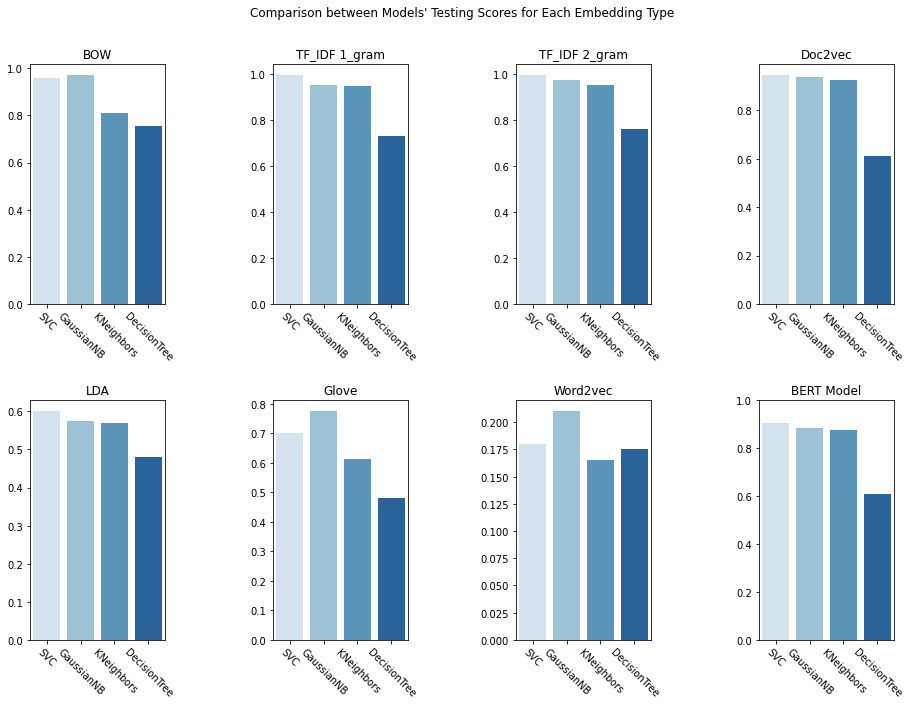

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, (results_df['Embedding type'].nunique()//2), figsize=(15,10));
fig.suptitle("Comparison between Models' Testing Scores for Each Embedding Type" );
k = 0
for i in range (0,2):
    for j in range (0,4):
        embed_type = results_df['Embedding type'].unique()[k]
        plt.ylim((0,1));
        axes[i][j].tick_params(axis='x', rotation=-45)
        axes[i][j].set_title(f"{embed_type}");
        sns.barplot(ax = axes[i][j], x= list(results_df['Model Name'].unique()), y=list(results_df[results_df['Embedding type'] == embed_type]['Testing Accuracy']),palette="Blues");
        k+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.4)

In [ ]:
results_df.to_csv('results.csv',index=False)

In [ ]:
#read cvs file
results_df=pd.read_csv('results.csv')
results_df

,Model Name,Embedding type,Training Accuracy,Testing Accuracy
0,SVC,BOW,1.00000,0.960
1,SVC,TF_IDF 1_gram,1.00000,0.995
2,SVC,TF_IDF 2_gram,1.00000,0.995
3,SVC,Doc2vec,0.99750,0.945
4,SVC,LDA,0.80000,0.600
5,SVC,Glove,0.77875,0.700
6,SVC,Word2vec,0.21875,0.180
7,SVC,BERT Model,0.93250,0.905
8,GaussianNB,BOW,1.00000,0.970
9,GaussianNB,TF_IDF 1_gram,1.00000,0.955


# BERT classifier

BERT can be used as the main classifier by fine tuning the model on our dataset 

This BERT implemented class can be imported from hugging face library which called transformers

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 35.0 MB/s 
     |████████████████████████████████| 346 kB 56.6 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.8 MB 54.8 MB/s 
     |████████████████████████████████| 10.1 MB 53.2 MB/s 
     |████████████████████████████████| 1.2 MB 50.1 MB/s 
     |████████████████████████████████| 145 kB 78.3 MB/s 
     |████████████████████████████████| 181 kB 73.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.4 MB/s 
     |████████████████████████████████| 212 kB 65.4 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 140 kB 73.4 MB/s 
     |████████████████████████████████| 127 kB 65.4 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████

In [ ]:
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# Defining Model
model = ClassificationModel('bert', 'bert-base-uncased',
                            use_cuda=True,
                            args={'reprocess_input_data': True,
                      'overwrite_output_dir': True},
                      num_labels=5,
                      )
# train the model
model.train_model(df_train)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/800 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(100, 1.065955352783203)

In [ ]:
# validate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df=df_train,acc=accuracy_score)
print('Training Accuracy',result['acc'])
result, model_outputs, wrong_predictions = model.eval_model(eval_df=df_test,acc=accuracy_score)
print('Testing  Accuracy',result['acc'])

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/800 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/100 [00:00<?, ?it/s]

Training Accuracy 0.93


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

Testing  Accuracy 0.88


EValuation on the 

## Setting Up the KFold Visualization Concept

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
from sklearn.model_selection import KFold

def plot_cv_indices(kfold_object,model_name,X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(kfold_object.split(X=X, y=y,groups=None)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(np.array(X)))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

        # Plot the data classes and groups at the end
        ax.scatter(
            range(len(np.array(X))), [ii + 1.5] * len(np.array(X)), c=np.array(y), marker="_", lw=lw, cmap=cmap_data
        )

    # Formatting
    yticklabels = list(range(n_splits+2)) + ["class"]
    ax.set(
        xlabel="Sample index",
        ylabel="CV iteration",
    )
    ax.set_title(f" KFold with {model_name} Model", fontsize=15)
    return ax

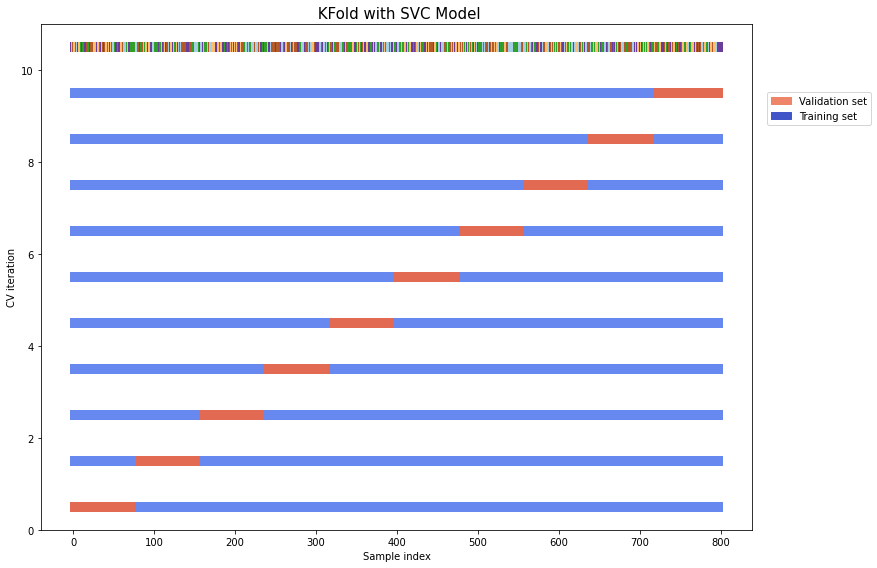

In [ ]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(15,8));
plot_cv_indices(KFold(10),model_name= 'SVC', X= X_train, y= y_train,ax=ax, n_splits=10, lw=10);
ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Validation set", "Training set"],
    loc=(1.02, 0.8),
);
# Make the legend fit
plt.tight_layout();
fig.subplots_adjust(right=0.7);
plt.show();

# Cross validation on the champion model

<h3> Champion model is support vector classifier (SVC) with Tf_idf transformation using uni gram<br>
which achivied Training accuracy 1.0 and Testing accuracy 0.965

In [ ]:
output_cv=cross_validate(SVC(),X_trained1g_cv.toarray(),y_train,cv=10,return_estimator=True)
model_cv=output_cv['estimator'][output_cv['test_score'].argmax()]
print(f'Model testing accuracy is {model_cv.score(X_test1g_cv.toarray(),y_test)}')
y_pred=model_cv.predict(X_test1g_cv.toarray())

Model testing accuracy is 0.995


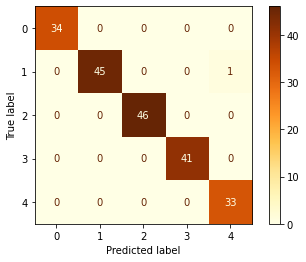

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix,plot_confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='YlOrBr',)
plt.grid(False)

# Error Analysis

<h2>Get the wrong examples

In [ ]:
wrongs=y_pred !=y_test
X_test[wrongs]

983    bow permit humble servant offer greet tha nks ...
Name: Sample of the book, dtype: object

In [ ]:
corrects_predictions=y_test[wrongs]
corrects_names=label_encoder.inverse_transform(corrects_predictions.to_list())
corrects_names.tolist()

['bryant-stories.txt']

In [ ]:
predictions=y_pred[wrongs]
prediction_names=label_encoder.inverse_transform(predictions)
prediction_names

array(['melville-moby_dick.txt'], dtype=object)

So, we will explore the weight of the words examples in the wrong and correct books

In [ ]:
selected_books

['melville-moby_dick.txt',
 'chesterton-ball.txt',
 'edgeworth-parents.txt',
 'austen-emma.txt',
 'bryant-stories.txt']

In [ ]:
cleaned_books_contents[0]

['moby',
 'dick',
 'herman',
 'melville',
 'etymology',
 'supply',
 'late',
 'consumptive',
 'usher',
 'grammar',
 'school',
 'pale',
 'usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'see',
 'dust',
 'old',
 'lexicon',
 'grammar',
 'queer',
 'handkerchief',
 'mockingly',
 'embellish',
 'gay',
 'flag',
 'know',
 'nation',
 'world',
 'love',
 'dust',
 'old',
 'grammar',
 'somehow',
 'mildly',
 'remind',
 'mortality',
 'take',
 'hand',
 'school',
 'others',
 'teach',
 'name',
 'whale',
 'fish',
 'call',
 'tongue',
 'leave',
 'ignorance',
 'letter',
 'h',
 'almost',
 'alone',
 'maketh',
 'signification',
 'word',
 'deliver',
 'true',
 'hackluyt',
 'whale',
 'sw',
 'dan',
 'hval',
 'animal',
 'name',
 'roundness',
 'roll',
 'dan',
 'hvalt',
 'arch',
 'vault',
 'webster',
 'dictionary',
 'whale',
 'immediately',
 'dut',
 'ger',
 'wallen',
 'walw',
 'ian',
 'roll',
 'wallow',
 'richardson',
 'dictionary',
 'ketos',
 'greek',
 'cetus',
 'latin',
 'whoel',
 'anglo',
 'saxon',
 'h

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter
example_freq=Counter(word_tokenize(X_test[wrongs].iloc[0]))
wrong_book_freq=Counter(cleaned_books_contents[0])
correct_book_freq=Counter(cleaned_books_contents[2])
word_freq=pd.DataFrame()
word_freq.index=word_tokenize(X_test[wrongs].iloc[0])
word_freq['Example']=0
word_freq['Wrong']=0
word_freq['Correct']=0
word_freq['Wrong is greater than']=0
for word in word_tokenize(X_test[wrongs].iloc[0]) :
    word_freq.loc[word,'Example']=example_freq[word]
    word_freq.loc[word,'Wrong']=wrong_book_freq[word]
    word_freq.loc[word,'Correct']=correct_book_freq[word]
    if wrong_book_freq[word]>correct_book_freq[word] :
        word_freq.loc[word,'Wrong is greater than']=1
word_freq

,Example,Wrong,Correct,Wrong is greater than
bow,2,109,73,1
permit,1,10,4,1
humble,1,2,5,0
servant,1,1,76,0
offer,1,23,30,0
...,...,...,...,...
even,1,209,146,1
allow,1,11,17,0
posse,1,9,2,1
mere,1,43,2,1


In [ ]:
word_freq['Wrong is greater than'].value_counts()

1    50
0    50
Name: Wrong is greater than, dtype: int64

<h2>This make sense because using number of frequency of each word not a good representation of the context of the sentence and may make the model confused like this example .

In [ ]:
def try_different_num_of_word (n=100):
    df_train_50_word=df_train['Sample of the book'].apply(lambda x : x[0:n])
    df_test_50_word=df_test['Sample of the book'].apply(lambda x : x[0:n])
    X_trained1g_50,X_test1g_50 = tfidf_ngram(1,X_train=df_train_50_word,X_test=X_test)
    champion_model.fit(X_trained1g_50.toarray(),y_train)
    test_acc=champion_model.score(X_test1g_50.toarray(),y_test)
    return test_acc

In [ ]:
for i in [70,50,40,30,20] :
    print(f'Number of samples {i} , Testing Accuracy {try_different_num_of_word (n=i)}')

0.935
0.905
0.91
0.895
0.805


<h2>We can notice that accuracy decreased by decreasing number of words in each partition and that is make sense because the model can't distinguish writing style when there are not enough words (number of features)

<h3>We can use Grid search to see the effect of different hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'kernel' :['rbf','linear'],
    'C':[1,10],
}
clf=GridSearchCV (model_cv,param_grid=param)
clf.fit(X_trained1g_cv.toarray(),y_train)
print(f'Training Accuracy = {clf.score(X_trained1g_cv.toarray(),y_train)}')
print(f'Testing  Accuracy = {clf.score(X_test1g_cv.toarray(),y_test)}')
clf.best_params_

Training Accuracy = 1.0
Testing  Accuracy = 0.995


{'C': 10, 'kernel': 'linear'}